# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

## SUBJECT 2

### DATA ACQUISITION & CLEANING

In [1]:
#Import relevant Dependencies

import datetime
import time
import pandas as pd # Pandas Version 1.0.5
import numpy as np
import requests
import requests_oauthlib
import webbrowser
import matplotlib.pyplot as plt
import json
import pickle
import os

In [2]:
%run FYP_SUBJECTS_CLASS.ipynb # line needed to reuse the SUBJECT class created for OOP

### SUBJECT DECLARATION

In [3]:
# SUBJECT DECLARATION (Declare seperately)

PERSON2 = SUBJECT(tracker='fitbit') # SUBJECT 2

### LOAD FROM EXISTING DATA (If Any)

In [4]:
current_directory = os.getcwd()
folder = "PERSON2"
file = "PERSON2_DATA_24MAY.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)
                      
with open(f_path,'rb') as f:
    PERSON2 = pickle.load(file=f)

In [5]:
PERSON2.intra_heart_data[PERSON2.last_fetch]

{'dataset': [{'time': '00:00:00', 'value': 67},
  {'time': '00:00:05', 'value': 66},
  {'time': '00:00:20', 'value': 66},
  {'time': '00:00:25', 'value': 67},
  {'time': '00:00:35', 'value': 63},
  {'time': '00:00:40', 'value': 62},
  {'time': '00:00:55', 'value': 62},
  {'time': '00:01:00', 'value': 64},
  {'time': '00:01:05', 'value': 65},
  {'time': '00:01:20', 'value': 65},
  {'time': '00:01:30', 'value': 64},
  {'time': '00:01:45', 'value': 64},
  {'time': '00:01:55', 'value': 65},
  {'time': '00:02:05', 'value': 67},
  {'time': '00:02:10', 'value': 68},
  {'time': '00:02:25', 'value': 68},
  {'time': '00:02:40', 'value': 68},
  {'time': '00:02:45', 'value': 67},
  {'time': '00:02:50', 'value': 68},
  {'time': '00:02:55', 'value': 69},
  {'time': '00:03:05', 'value': 68},
  {'time': '00:03:10', 'value': 66},
  {'time': '00:03:15', 'value': 65},
  {'time': '00:03:20', 'value': 66},
  {'time': '00:03:30', 'value': 67},
  {'time': '00:03:36', 'value': 68},
  {'time': '00:03:46', 'val

### Authourisation:

In [6]:
#Specifying Client ID and Client Secret from Fitbit
CLIENT_ID_FIB = '22BFYR'
CLIENT_SECRET_FIB = '9f459d1baeec4287926ca73067957f6e'
CALL_BACK_URL = 'https://1jia99ming2.wixsite.com/finalyearproject' #'http://127.0.0.1:8080/'

PERSON2.Authorise(CLIENT_ID_FIB,CLIENT_SECRET_FIB,CALL_BACK_URL)

Broweser will call this URL (send this to the subject): https://www.fitbit.com/oauth2/authorize?response_type=code&client_id=22BFYR&redirect_uri=http%3A%2F%2F127.0.0.1%3A8080%2F&scope=activity+heartrate+profile+sleep+weight&state=9uD0ZOSvZKatjcUQHeAeiVcvP6F4dr
 Copy & Paste the full callback URL:http://127.0.0.1:8080/?code=ca7d2666baaf28afffb2129b14d0a5f724c08122&state=9uD0ZOSvZKatjcUQHeAeiVcvP6F4dr#=
Success!


In [7]:
PERSON2.Fetch_Profile()
PERSON2.profile

Success!


{'age': 27, 'gender': 'MALE', 'height': 176.0, 'weight': 65.0}

### Saving the existing data for adding on later.

In [8]:
subject = PERSON2 # CHANGE PERSON HERE!!

In [9]:
# Saving the existing data for adding on later.
existing_heart_data = subject.heart_data
existing_intra_heart_data = subject.intra_heart_data
existing_sleep_data = subject.sleep_data
existing_step_activity_data = subject.step_activity_data


In [11]:
existing_intra_heart_data

{'2020-04-05': {'dataset': [{'time': '12:40:20', 'value': 93},
   {'time': '12:40:25', 'value': 70},
   {'time': '12:40:30', 'value': 70},
   {'time': '12:40:45', 'value': 70},
   {'time': '12:40:50', 'value': 72},
   {'time': '12:40:55', 'value': 80},
   {'time': '12:41:00', 'value': 81},
   {'time': '12:41:09', 'value': 81},
   {'time': '12:41:24', 'value': 81},
   {'time': '12:41:39', 'value': 81},
   {'time': '12:41:49', 'value': 86},
   {'time': '12:41:54', 'value': 92},
   {'time': '12:42:04', 'value': 91},
   {'time': '12:42:09', 'value': 88},
   {'time': '12:42:14', 'value': 84},
   {'time': '12:42:29', 'value': 84},
   {'time': '12:42:34', 'value': 80},
   {'time': '12:42:39', 'value': 77},
   {'time': '12:42:54', 'value': 78},
   {'time': '12:42:59', 'value': 77},
   {'time': '12:43:04', 'value': 79},
   {'time': '12:43:09', 'value': 81},
   {'time': '12:43:14', 'value': 82},
   {'time': '12:43:19', 'value': 81},
   {'time': '12:43:24', 'value': 82},
   {'time': '12:43:29', '

In [12]:
subject.last_fetch

'2020-05-24'

### Fetch Data From  API and adding to existing data:

In [13]:
# DECLARE THE DATE RANGE, Note that the date range cannot be too long to prevent running too long.
# Data is in the form of a list, thus new elements can be add to the existing list.

next_date = datetime.datetime.strptime(subject.last_fetch,"%Y-%m-%d") + datetime.timedelta(days=1)
date1 = datetime.datetime.strftime(next_date,"%Y-%m-%d")
date2 = "2020-07-31" # --> CHANGE DATE HERE!! Can consider to use strftime(now())

# Data is in the form of a List, thus new elements can be add to the existing list:

# 1) Heart Rate Data:
subject.Fetch_HR_Data(date1,date2)
subject.heart_data = existing_heart_data + subject.heart_data 

# 2) Step Activity Data:
subject.Fetch_Step_Activity_Data(date1,date2)
subject.step_activity_data = existing_step_activity_data + subject.step_activity_data


Success!
Success!


In [14]:
# 3) Intra-Day Heart Rate Data: (Data is in form of Dictionary, new data is added in the FOR loop)
subject.Fetch_IntraDayHR_Data(date1,date2)

for d in subject.intra_heart_data.keys():
    existing_intra_heart_data[d] = subject.intra_heart_data[d]

subject.intra_heart_data = existing_intra_heart_data

Success!


In [17]:
print(list(subject.intra_heart_data.keys())[0], list(subject.intra_heart_data.keys())[-1])


2020-04-05 2020-07-31


In [20]:
# 4) Sleep Data

# manually keying the date range for fetching Sleep Data (maximum 1 month only). Can be automated.

subject.Fetch_Sleep_Data("2020-05-25","2020-06-30")
sleep_set = subject.sleep_data
subject.Fetch_Sleep_Data("2020-07-01","2020-07-31")
subject.sleep_data = subject.sleep_data + sleep_set

# adding back the data from last fetched
subject.sleep_data = subject.sleep_data + existing_sleep_data

Success!
Success!


In [21]:
subject.sleep_data

[{'dateOfSleep': '2020-07-31',
  'duration': 39300000,
  'efficiency': 93,
  'endTime': '2020-07-31T11:26:30.000',
  'infoCode': 0,
  'isMainSleep': True,
  'levels': {'data': [{'dateTime': '2020-07-31T00:31:30.000',
     'level': 'wake',
     'seconds': 30},
    {'dateTime': '2020-07-31T00:32:00.000', 'level': 'light', 'seconds': 840},
    {'dateTime': '2020-07-31T00:46:00.000', 'level': 'deep', 'seconds': 300},
    {'dateTime': '2020-07-31T00:51:00.000', 'level': 'light', 'seconds': 150},
    {'dateTime': '2020-07-31T00:53:30.000', 'level': 'deep', 'seconds': 330},
    {'dateTime': '2020-07-31T00:59:00.000', 'level': 'light', 'seconds': 210},
    {'dateTime': '2020-07-31T01:02:30.000', 'level': 'deep', 'seconds': 270},
    {'dateTime': '2020-07-31T01:07:00.000', 'level': 'light', 'seconds': 2280},
    {'dateTime': '2020-07-31T01:45:00.000', 'level': 'rem', 'seconds': 330},
    {'dateTime': '2020-07-31T01:50:30.000', 'level': 'light', 'seconds': 1380},
    {'dateTime': '2020-07-31T02:

### Dumping Raw API Data into a PICKLE file

Establish File Path:

In [22]:
# USE WHEN NECESSARY
# This saves and loads the data after fetching from the APIs for future use.
# The amount of records will increase every time we fetch from the API.  
# PICKLE files can take up a lot space.

current_directory = os.getcwd()
folder = "PERSON2"
file = "PERSON2_DATA_31JUL.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)


Save to file:

In [23]:
# Save Everything regarding the Subject to Pickle file:
PERSON2.last_fetch = '2020-07-31'

with open(f_path,'wb') as f:
    pickle.dump(obj=subject,file=f)


### [FITBIT] PUTTING INTO DATAFRAMES & TIDYING THE REQUIRED DATA

### Daily Heart Rate:

In [24]:

#Putting the HR Data into Pandas

# Aternatively, normalizing the data at differnt levels using only JSON_Normalize()


df_HR_fitbit_Norm = pd.DataFrame.from_records(subject.heart_data)
split = pd.json_normalize(df_HR_fitbit_Norm.value)

for i in split.columns:
    df_HR_fitbit_Norm[i] = split[i]

df_HR_fitbit_Norm.drop(columns=['value','customHeartRateZones'],inplace=True)

df_HR_fitbit_Norm


,dateTime,heartRateZones,restingHeartRate
0,2020-04-05,"[{'caloriesOut': 321.2478, 'max': 96, 'min': 3...",NaN
1,2020-04-06,"[{'caloriesOut': 939.647, 'max': 96, 'min': 30...",59.0
2,2020-04-07,"[{'caloriesOut': 1351.5378, 'max': 96, 'min': ...",58.0
3,2020-04-08,"[{'caloriesOut': 1814.3238, 'max': 96, 'min': ...",57.0
4,2020-04-09,"[{'caloriesOut': 1608.9414, 'max': 96, 'min': ...",56.0
...,...,...,...
113,2020-07-27,"[{'caloriesOut': 1922.8702, 'max': 96, 'min': ...",56.0
114,2020-07-28,"[{'caloriesOut': 1991.2184, 'max': 96, 'min': ...",57.0
115,2020-07-29,"[{'caloriesOut': 1986.827, 'max': 96, 'min': 3...",NaN
116,2020-07-30,"[{'caloriesOut': 2142.4402, 'max': 96, 'min': ...",58.0


##### Resting Heart Rate Data Frame:

In [25]:
# Resting Heart Rate Data Frame
df_RESTING_HR_fitbit = df_HR_fitbit_Norm[['dateTime','restingHeartRate']]
df_RESTING_HR_fitbit = df_RESTING_HR_fitbit.set_index(df_RESTING_HR_fitbit.dateTime)
df_RESTING_HR_fitbit = df_RESTING_HR_fitbit.drop(columns=['dateTime'])
df_RESTING_HR_fitbit

,restingHeartRate
dateTime,
2020-04-05,NaN
2020-04-06,59.0
2020-04-07,58.0
2020-04-08,57.0
2020-04-09,56.0
...,...
2020-07-27,56.0
2020-07-28,57.0
2020-07-29,NaN


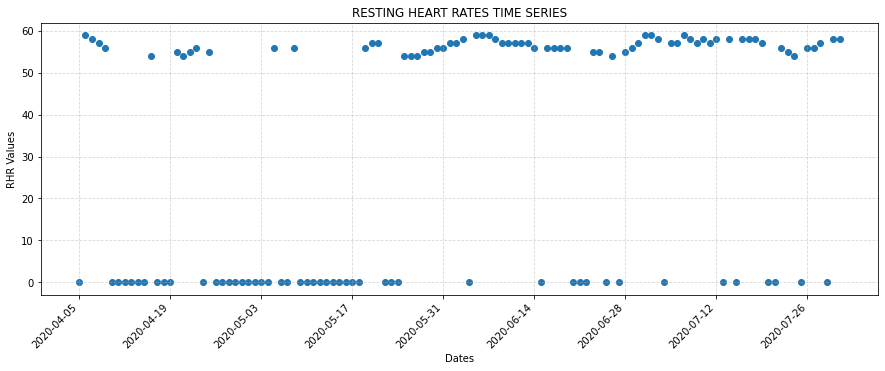

In [26]:
# Plotting RHR plot:

plt.figure(figsize=(15,5))
y_values = df_RESTING_HR_fitbit.restingHeartRate.fillna(0)
plt.scatter(x=df_RESTING_HR_fitbit.index,y=y_values)
plt.xticks(np.arange(0,len(df_RESTING_HR_fitbit),14),rotation=45,ha='right')
plt.title('RESTING HEART RATES TIME SERIES')

plt.ylabel('RHR Values')

plt.xlabel('Dates')

plt.grid(True,alpha=0.5,ls='--')

plt.show()

In [27]:
# FINDING DAYS WHERE RESTING HR IS INVAILD:
# The invalid records will be dropped in the below code. 
# The dates will be used later to compare the dates with null Intra-Day records.
# Null data is due to not enough information in rest state.

null_RHR_dates = df_RESTING_HR_fitbit[np.isnan(df_RESTING_HR_fitbit.restingHeartRate)].index.tolist()

total = len(df_RESTING_HR_fitbit.index)

print('Total number of recorded days for RHR data:', total, 
      ', Not Null:', total - len(null_RHR_dates), ', Null:',len(null_RHR_dates))

print('\nDay with null RHR records: \n',null_RHR_dates)

Total number of recorded days for RHR data: 118 , Not Null: 69 , Null: 49

Day with null RHR records: 
 ['2020-04-05', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-24', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-06', '2020-05-07', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-22', '2020-05-23', '2020-05-24', '2020-06-04', '2020-06-15', '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-25', '2020-06-27', '2020-07-04', '2020-07-13', '2020-07-15', '2020-07-20', '2020-07-21', '2020-07-25', '2020-07-29']



The Heart Rate Activities from API were in the format of a nested JSON, thus the following steps were applied to archieve the required data.
1. using PD.DATAFRAME.FROM_RECORD() and JSON_NORMALISE() to put the nested JSON into a more readerable format (executed above).
2. Seperating Resting Heart Rate, RHR with the Heart Rate Zones data (executed above).
3. using DF.EXPLODE method to split the list of Heart Rate Zone activities into rows as each record consists of 4 items.

In [28]:
# Heart Rate Activities
df_HR_ZONES_fitbit = df_HR_fitbit_Norm[['dateTime','heartRateZones']]
df_HR_ZONES_fitbit = df_HR_ZONES_fitbit.explode('heartRateZones')

df_HR_ZONES_fitbit

,dateTime,heartRateZones
0,2020-04-05,"{'caloriesOut': 321.2478, 'max': 96, 'min': 30..."
0,2020-04-05,"{'caloriesOut': 103.9298, 'max': 135, 'min': 9..."
0,2020-04-05,"{'caloriesOut': 0, 'max': 164, 'min': 135, 'mi..."
0,2020-04-05,"{'caloriesOut': 0, 'max': 220, 'min': 164, 'mi..."
1,2020-04-06,"{'caloriesOut': 939.647, 'max': 96, 'min': 30,..."
...,...,...
116,2020-07-30,"{'caloriesOut': 0, 'max': 220, 'min': 164, 'mi..."
117,2020-07-31,"{'caloriesOut': 2112.376, 'max': 96, 'min': 30..."
117,2020-07-31,"{'caloriesOut': 131.2916, 'max': 135, 'min': 9..."
117,2020-07-31,"{'caloriesOut': 0, 'max': 164, 'min': 135, 'mi..."



OBSERVATIONS: The Heart Rate Zones are all fixed values. The only useful information is 'caloriesOut and 'minutes'. Therefore, columns should be modified to:
- "Total_caloriesOut"
- "minutes_Regular"
- "minutes_Fatburn"
- "minutes_Cardio"
- "minutes_Peak"

NOTE: The Heart Rate Zones are customisable within the Fitbit app, thus the HR range defined as zones may not be the same. I am using the default:
- 'max': 96,'min': 30, -> Out of Range (Should be Regular HR)
- 'max': 135,'min': 96, -> Fat Burn
- 'max': 164,'min': 135, -> Cardio
- 'max': 220,'min': 164, -> Peak


In [29]:
def fetch_Cal(x_in):
    try:
        return x_in['caloriesOut']
    except KeyError:
        return np.NaN

def fetch_Minutes(x_in):
    try:
        return x_in['minutes']
    except KeyError:
        return np.NaN

#creating new columns for total calories each day
df_HR_ZONES_fitbit['Total_caloriesOut'] = df_HR_ZONES_fitbit.heartRateZones.apply(fetch_Cal)
df_HR_ZONES_fitbit_new = df_HR_ZONES_fitbit.groupby(['dateTime']).sum()
df_HR_ZONES_fitbit_new = df_HR_ZONES_fitbit_new.reset_index()

#creating new columns for active timings each day
df_HR_ZONES_fitbit_new['minutes_Regular'] = df_HR_ZONES_fitbit[0::4].heartRateZones.apply(fetch_Minutes) #skip every 4 lines
df_HR_ZONES_fitbit_new['minutes_Fatburn'] = df_HR_ZONES_fitbit[1::4].heartRateZones.apply(fetch_Minutes) #skip every 4 lines
df_HR_ZONES_fitbit_new['minutes_Cardio'] = df_HR_ZONES_fitbit[2::4].heartRateZones.apply(fetch_Minutes) #skip every 4 lines
df_HR_ZONES_fitbit_new['minutes_Peak'] = df_HR_ZONES_fitbit[3::4].heartRateZones.apply(fetch_Minutes) #skip every 4 lines
df_HR_ZONES_fitbit_new['Total_minutes'] = df_HR_ZONES_fitbit_new[['minutes_Regular','minutes_Fatburn','minutes_Cardio','minutes_Peak']].sum(axis=1)

df_HR_ZONES_fitbit_new = df_HR_ZONES_fitbit_new.set_index(df_HR_ZONES_fitbit_new.dateTime)
df_HR_ZONES_fitbit_new = df_HR_ZONES_fitbit_new.drop(columns=['dateTime'])

df_HR_ZONES_fitbit_new


,Total_caloriesOut,minutes_Regular,minutes_Fatburn,minutes_Cardio,minutes_Peak,Total_minutes
dateTime,,,,,,
2020-04-05,425.1776,142.0,20.0,0.0,0.0,162.0
2020-04-06,1500.0572,533.0,66.0,19.0,1.0,619.0
2020-04-07,1409.0764,678.0,14.0,0.0,0.0,692.0
2020-04-08,2292.8738,1145.0,62.0,13.0,0.0,1220.0
2020-04-09,1678.3030,1027.0,16.0,0.0,0.0,1043.0
...,...,...,...,...,...,...
2020-07-27,2128.7030,1192.0,43.0,1.0,0.0,1236.0
2020-07-28,2025.1110,1337.0,7.0,0.0,0.0,1344.0
2020-07-29,2242.6542,1105.0,54.0,0.0,0.0,1159.0


##### Intra - Day Heart Rate Data Frame:

In [30]:
# A dict of serveral intraday data has been fetched. Need to find a way to consistently fetch data and store.
# The days with no values are already excluded by default (no records).
# This step puts the dict into pandas df and adds a timestamp column for plotting.

df_Intra_HR_AllinSeries = pd.DataFrame()

for dt in subject.intra_heart_data.keys():
    if subject.intra_heart_data[dt]['dataset']: #if not empty
        df_Intra_HR_fitbit = pd.DataFrame.from_records(subject.intra_heart_data[dt]['dataset'])
        df_Intra_HR_fitbit['date'] = pd.Series(index=range(0,df_Intra_HR_fitbit.shape[0])).fillna(dt)

        df_Intra_HR_fitbit['timestamp'] = pd.to_numeric(df_Intra_HR_fitbit.time.apply(lambda x: datetime.datetime.strptime(x,"%H:%M:%S")))

        df_Intra_HR_fitbit['d_time'] = df_Intra_HR_fitbit.time.apply(lambda x: datetime.datetime.strptime(dt+" "+x,"%Y-%m-%d %H:%M:%S"))
        df_Intra_HR_fitbit['d_timestamp'] = pd.to_numeric(df_Intra_HR_fitbit.d_time)
    
#     else: #Fill in a np.NaN df
#         df_Intra_HR_fitbit = pd.DataFrame({'time':np.NaN,'value':np.NaN,'date':dt,'timestamp':np.NaN,
#                                            'd_time':np.NaN,'d_timestamp':np.NaN},index=[0])
    df_Intra_HR_AllinSeries = df_Intra_HR_AllinSeries.append(df_Intra_HR_fitbit)

# df_Intra_HR_AllinSeries = df_Intra_HR_AllinSeries.reset_index(drop=True)
# Setting the index to datetime:
df_Intra_HR_AllinSeries = df_Intra_HR_AllinSeries.set_index(df_Intra_HR_AllinSeries.d_time)
df_Intra_HR_AllinSeries = df_Intra_HR_AllinSeries.drop(columns=['d_time'])

df_Intra_HR_AllinSeries

C:\Users\jia92\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


,time,value,date,timestamp,d_timestamp
d_time,,,,,
2020-04-05 12:40:20,12:40:20,93,2020-04-05,-2208943180000000000,1586090420000000000
2020-04-05 12:40:25,12:40:25,70,2020-04-05,-2208943175000000000,1586090425000000000
2020-04-05 12:40:30,12:40:30,70,2020-04-05,-2208943170000000000,1586090430000000000
2020-04-05 12:40:45,12:40:45,70,2020-04-05,-2208943155000000000,1586090445000000000
2020-04-05 12:40:50,12:40:50,72,2020-04-05,-2208943150000000000,1586090450000000000
...,...,...,...,...,...
2020-07-31 23:58:26,23:58:26,52,2020-07-31,-2208902494000000000,1596239906000000000
2020-07-31 23:58:41,23:58:41,53,2020-07-31,-2208902479000000000,1596239921000000000
2020-07-31 23:58:46,23:58:46,54,2020-07-31,-2208902474000000000,1596239926000000000


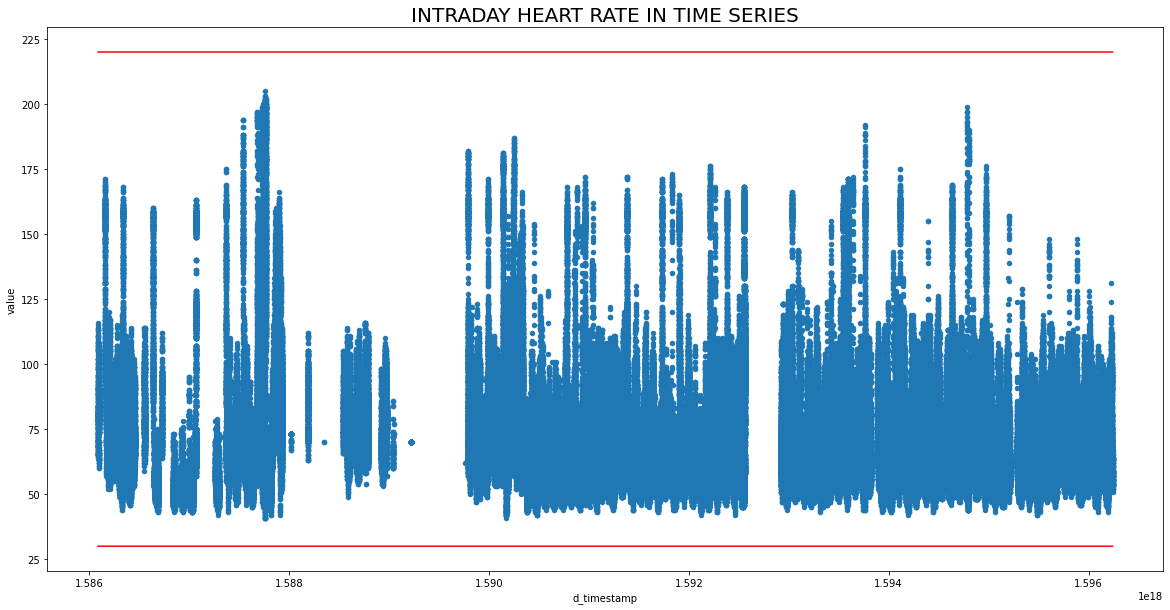

In [31]:
# PLOTTING ALL DATA IN A TIME SERIES
df_Intra_HR_AllinSeries.plot(kind="scatter",x="d_timestamp",y="value",figsize=(20,10))

# maximum possible heart rate level (220)
plt.plot(df_Intra_HR_AllinSeries.d_timestamp,
         np.full_like(df_Intra_HR_AllinSeries.d_timestamp,220),'r')

# minimum possible heart rate level (30)
plt.plot(df_Intra_HR_AllinSeries.d_timestamp,
         np.full_like(df_Intra_HR_AllinSeries.d_timestamp,30),'r')

plt.title('INTRADAY HEART RATE IN TIME SERIES',fontdict={'fontsize':20})
plt.show()

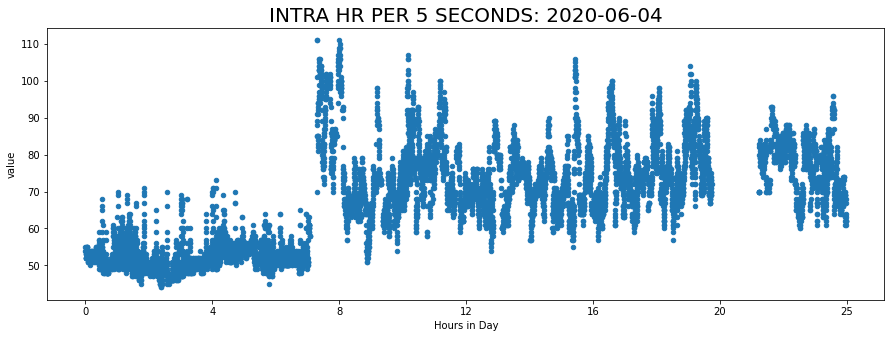

In [32]:
# PLOTTING DAYS ONE BY ONE (for better visualisation on daily basis)

time_ticks = pd.date_range("1900-01-01","1900-01-02",freq='4H') # plot out hour scale
time_label = np.linspace(0,25,num=7,dtype=int)

Date_Select = '2020-06-04' # Change date here

mask = df_Intra_HR_AllinSeries.date == Date_Select
df_Intra_HR_AllinSeries[mask].plot(kind='scatter',x='timestamp',y='value',figsize=(15,5))

plt.title('INTRA HR PER 5 SECONDS: '+ Date_Select,fontdict={'fontsize':20})
plt.xlabel('Hours in Day')
plt.xticks(pd.to_numeric(time_ticks),time_label)
    
plt.show()

In [ ]:
# (if required) Checking the records to exclude that exceeds the max and min limits of possible heart rates

In [33]:
# Checking the number of missing days for Intra-Day Records:

null_IntraDay_dates = [dt for dt in subject.intra_heart_data.keys() 
             if not subject.intra_heart_data[dt]['dataset']]

count_null = len(null_IntraDay_dates)

count_not_null = len(subject.intra_heart_data.keys()) - count_null

print('Total number of recorded days of Intra-Day data: '+str(len(subject.intra_heart_data.keys())), 
      ', Not Null: ' +str(count_not_null),', Null: ' +str(count_null))
print('\nDays with no records: \n',null_IntraDay_dates)

Total number of recorded days of Intra-Day data: 118 , Not Null: 101 , Null: 17

Days with no records: 
 ['2020-04-13', '2020-04-17', '2020-04-18', '2020-04-28', '2020-04-30', '2020-05-02', '2020-05-07', '2020-05-10', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-06-20', '2020-06-21', '2020-06-22']


### Sleep Data Frames:

In [34]:
subject.sleep_data

[{'dateOfSleep': '2020-07-31',
  'duration': 39300000,
  'efficiency': 93,
  'endTime': '2020-07-31T11:26:30.000',
  'infoCode': 0,
  'isMainSleep': True,
  'levels': {'data': [{'dateTime': '2020-07-31T00:31:30.000',
     'level': 'wake',
     'seconds': 30},
    {'dateTime': '2020-07-31T00:32:00.000', 'level': 'light', 'seconds': 840},
    {'dateTime': '2020-07-31T00:46:00.000', 'level': 'deep', 'seconds': 300},
    {'dateTime': '2020-07-31T00:51:00.000', 'level': 'light', 'seconds': 150},
    {'dateTime': '2020-07-31T00:53:30.000', 'level': 'deep', 'seconds': 330},
    {'dateTime': '2020-07-31T00:59:00.000', 'level': 'light', 'seconds': 210},
    {'dateTime': '2020-07-31T01:02:30.000', 'level': 'deep', 'seconds': 270},
    {'dateTime': '2020-07-31T01:07:00.000', 'level': 'light', 'seconds': 2280},
    {'dateTime': '2020-07-31T01:45:00.000', 'level': 'rem', 'seconds': 330},
    {'dateTime': '2020-07-31T01:50:30.000', 'level': 'light', 'seconds': 1380},
    {'dateTime': '2020-07-31T02:

In [35]:
df_Sleep_Fitbit = pd.DataFrame.from_records(subject.sleep_data)
df_Sleep_Fitbit
# Note: DURATION is in MiliSeconds

,dateOfSleep,duration,efficiency,endTime,infoCode,isMainSleep,levels,logId,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,timeInBed,type
0,2020-07-31,39300000,93,2020-07-31T11:26:30.000,0,True,{'data': [{'dateTime': '2020-07-31T00:31:30.00...,28261990684,0,590,65,0,2020-07-31T00:31:30.000,655,stages
1,2020-07-30,27540000,98,2020-07-30T06:52:30.000,0,True,{'data': [{'dateTime': '2020-07-29T23:13:30.00...,28261990683,2,419,40,0,2020-07-29T23:13:30.000,459,stages
2,2020-07-29,23220000,97,2020-07-29T05:57:00.000,0,True,{'data': [{'dateTime': '2020-07-28T23:30:00.00...,28261990682,1,325,62,0,2020-07-28T23:30:00.000,387,stages
3,2020-07-28,28500000,98,2020-07-28T07:12:00.000,0,True,{'data': [{'dateTime': '2020-07-27T23:17:00.00...,28261990681,0,420,55,0,2020-07-27T23:17:00.000,475,stages
4,2020-07-27,14820000,99,2020-07-27T07:10:00.000,0,True,{'data': [{'dateTime': '2020-07-27T03:03:00.00...,28261990680,0,222,25,0,2020-07-27T03:03:00.000,247,stages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-04-15,30780000,95,2020-04-15T11:06:00.000,0,True,{'data': [{'dateTime': '2020-04-15T02:32:30.00...,26763053477,0,435,78,0,2020-04-15T02:32:30.000,513,stages
65,2020-04-14,24480000,97,2020-04-14T11:17:30.000,0,True,{'data': [{'dateTime': '2020-04-14T04:29:30.00...,26731311657,0,358,50,0,2020-04-14T04:29:30.000,408,stages
66,2020-04-12,29640000,97,2020-04-12T10:43:00.000,0,True,{'data': [{'dateTime': '2020-04-12T02:28:30.00...,26718512805,0,439,55,0,2020-04-12T02:28:30.000,494,stages
67,2020-04-09,23820000,99,2020-04-09T07:05:00.000,0,True,{'data': [{'dateTime': '2020-04-09T00:28:00.00...,26663784106,0,352,45,0,2020-04-09T00:28:00.000,397,stages


##### Sleep Durations Data Frame:

In [36]:
# DF for sleep durations (exluding naps):
df_SleepDurations_Fitbit = df_Sleep_Fitbit[df_Sleep_Fitbit.isMainSleep==True].loc[:,
                                            ['dateOfSleep','duration','minutesAsleep','efficiency',
                                            'startTime','endTime']]
df_SleepDurations_Fitbit = df_SleepDurations_Fitbit.reset_index(drop=True)

# Converting the duration from miliseconds to minutes 
df_SleepDurations_Fitbit['duration'] = df_SleepDurations_Fitbit.duration.apply(lambda x:x/1000/60)

# Changing the Start time and End time into DateTime:
df_SleepDurations_Fitbit['startTime'] = pd.to_datetime(df_SleepDurations_Fitbit.startTime)
df_SleepDurations_Fitbit['endTime'] = pd.to_datetime(df_SleepDurations_Fitbit.endTime)

df_SleepDurations_Fitbit

,dateOfSleep,duration,minutesAsleep,efficiency,startTime,endTime
0,2020-07-31,655.0,590,93,2020-07-31 00:31:30,2020-07-31 11:26:30
1,2020-07-30,459.0,419,98,2020-07-29 23:13:30,2020-07-30 06:52:30
2,2020-07-29,387.0,325,97,2020-07-28 23:30:00,2020-07-29 05:57:00
3,2020-07-28,475.0,420,98,2020-07-27 23:17:00,2020-07-28 07:12:00
4,2020-07-27,247.0,222,99,2020-07-27 03:03:00,2020-07-27 07:10:00
...,...,...,...,...,...,...
56,2020-04-15,513.0,435,95,2020-04-15 02:32:30,2020-04-15 11:06:00
57,2020-04-14,408.0,358,97,2020-04-14 04:29:30,2020-04-14 11:17:30
58,2020-04-12,494.0,439,97,2020-04-12 02:28:30,2020-04-12 10:43:00
59,2020-04-09,397.0,352,99,2020-04-09 00:28:00,2020-04-09 07:05:00


As shown above, we can see that the date of sleep reflects the date when the sleep occurred. However, the date would be in relation with the previous or following day's activity. So, depending on the study, the date have to be adjusted for linkage to other DFs.

##### Intra - Sleep Detail Data Frame:

In [37]:
#DF for detailed stages of sleep:

df_intraSleepStage_Fitbit = df_Sleep_Fitbit[df_Sleep_Fitbit.isMainSleep==True].loc[:,['dateOfSleep','levels']]
df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.reset_index(drop=True)

df_intraSleepStage_Fitbit = pd.json_normalize(df_intraSleepStage_Fitbit.levels,sep='_')

df_intraSleepStage_Fitbit


,data,shortData,summary_deep_count,summary_deep_minutes,summary_deep_thirtyDayAvgMinutes,summary_light_count,summary_light_minutes,summary_light_thirtyDayAvgMinutes,summary_rem_count,summary_rem_minutes,summary_rem_thirtyDayAvgMinutes,summary_wake_count,summary_wake_minutes,summary_wake_thirtyDayAvgMinutes,summary_asleep_count,summary_asleep_minutes,summary_awake_count,summary_awake_minutes,summary_restless_count,summary_restless_minutes
0,"[{'dateTime': '2020-07-31T00:31:30.000', 'leve...","[{'dateTime': '2020-07-31T00:58:00.000', 'leve...",7.0,88.0,73.0,48.0,367.0,235.0,18.0,135.0,79.0,55.0,65.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'dateTime': '2020-07-29T23:13:30.000', 'leve...","[{'dateTime': '2020-07-29T23:13:30.000', 'leve...",4.0,78.0,73.0,31.0,252.0,234.0,14.0,89.0,78.0,34.0,40.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'dateTime': '2020-07-28T23:30:00.000', 'leve...","[{'dateTime': '2020-07-28T23:36:30.000', 'leve...",3.0,77.0,72.0,23.0,218.0,235.0,6.0,30.0,81.0,24.0,62.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'dateTime': '2020-07-27T23:17:00.000', 'leve...","[{'dateTime': '2020-07-28T00:02:30.000', 'leve...",3.0,68.0,73.0,30.0,256.0,233.0,13.0,96.0,80.0,32.0,55.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'dateTime': '2020-07-27T03:03:00.000', 'leve...","[{'dateTime': '2020-07-27T03:03:00.000', 'leve...",3.0,42.0,75.0,16.0,131.0,240.0,6.0,49.0,82.0,16.0,25.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,"[{'dateTime': '2020-04-15T02:32:30.000', 'leve...","[{'dateTime': '2020-04-15T02:51:30.000', 'leve...",4.0,82.0,69.0,37.0,260.0,229.0,14.0,93.0,85.0,37.0,78.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
57,"[{'dateTime': '2020-04-14T04:29:30.000', 'leve...","[{'dateTime': '2020-04-14T04:29:30.000', 'leve...",1.0,28.0,82.0,27.0,273.0,214.0,6.0,57.0,94.0,28.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
58,"[{'dateTime': '2020-04-12T02:28:30.000', 'leve...","[{'dateTime': '2020-04-12T02:28:30.000', 'leve...",6.0,81.0,83.0,30.0,224.0,209.0,18.0,134.0,74.0,40.0,55.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN
59,"[{'dateTime': '2020-04-09T00:28:00.000', 'leve...","[{'dateTime': '2020-04-09T00:31:30.000', 'leve...",6.0,86.0,80.0,25.0,196.0,221.0,7.0,70.0,78.0,27.0,45.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN


As observed from the above, the data from the "summary" are durations of different sleep stages thus, can be included in the df_SleepDurations_Fitbit

In [38]:
# Adding duration of sleep stages durations into df_SleepDurations_fitbit 

df_SleepDurations_Fitbit['DeepSleep_Count'] = df_intraSleepStage_Fitbit['summary_deep_count']
df_SleepDurations_Fitbit['DeepSleep_Minutes'] = df_intraSleepStage_Fitbit['summary_deep_minutes']

df_SleepDurations_Fitbit['LightSleep_Count'] = df_intraSleepStage_Fitbit['summary_light_count']
df_SleepDurations_Fitbit['LightSleep_Minutes'] = df_intraSleepStage_Fitbit['summary_light_minutes']

df_SleepDurations_Fitbit['RemSleep_Count'] = df_intraSleepStage_Fitbit['summary_rem_count']
df_SleepDurations_Fitbit['RemSleep_Minutes'] = df_intraSleepStage_Fitbit['summary_rem_minutes']

df_SleepDurations_Fitbit['Wake_Count'] = df_intraSleepStage_Fitbit['summary_wake_count']
df_SleepDurations_Fitbit['Wake_Minutes'] = df_intraSleepStage_Fitbit['summary_wake_minutes']

# Resetting the index to datetime:
df_SleepDurations_Fitbit.set_index(df_SleepDurations_Fitbit.dateOfSleep,inplace=True)
df_SleepDurations_Fitbit.drop(columns=['dateOfSleep'],inplace=True)

df_SleepDurations_Fitbit

,duration,minutesAsleep,efficiency,startTime,endTime,DeepSleep_Count,DeepSleep_Minutes,LightSleep_Count,LightSleep_Minutes,RemSleep_Count,RemSleep_Minutes,Wake_Count,Wake_Minutes
dateOfSleep,,,,,,,,,,,,,
2020-07-31,655.0,590,93,2020-07-31 00:31:30,2020-07-31 11:26:30,7.0,88.0,48.0,367.0,18.0,135.0,55.0,65.0
2020-07-30,459.0,419,98,2020-07-29 23:13:30,2020-07-30 06:52:30,4.0,78.0,31.0,252.0,14.0,89.0,34.0,40.0
2020-07-29,387.0,325,97,2020-07-28 23:30:00,2020-07-29 05:57:00,3.0,77.0,23.0,218.0,6.0,30.0,24.0,62.0
2020-07-28,475.0,420,98,2020-07-27 23:17:00,2020-07-28 07:12:00,3.0,68.0,30.0,256.0,13.0,96.0,32.0,55.0
2020-07-27,247.0,222,99,2020-07-27 03:03:00,2020-07-27 07:10:00,3.0,42.0,16.0,131.0,6.0,49.0,16.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15,513.0,435,95,2020-04-15 02:32:30,2020-04-15 11:06:00,4.0,82.0,37.0,260.0,14.0,93.0,37.0,78.0
2020-04-14,408.0,358,97,2020-04-14 04:29:30,2020-04-14 11:17:30,1.0,28.0,27.0,273.0,6.0,57.0,28.0,50.0
2020-04-12,494.0,439,97,2020-04-12 02:28:30,2020-04-12 10:43:00,6.0,81.0,30.0,224.0,18.0,134.0,40.0,55.0


Back to the sleep stages, we can further explode the details in the 'data' column of the df_intraSleepStage_Fitbit. The 'shortData' column is not very useful to us, thus it will be dropped. the rest of the columns were also included in df_SleepDurations_fitbit, thus will also be dropped.

In [39]:
df_intraSleepStage_Fitbit['dateOfSleep'] = df_SleepDurations_Fitbit.index

df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.explode('data')

df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.reset_index(drop=True)

sleep_data_Jnorm = pd.json_normalize(df_intraSleepStage_Fitbit.data)

df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.loc[:,['dateOfSleep','data']]

df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.join(sleep_data_Jnorm)

# Converting Seconds to minutes
df_intraSleepStage_Fitbit['minutes'] = df_intraSleepStage_Fitbit.seconds.apply(lambda x:x/60)
df_intraSleepStage_Fitbit['dateTime'] = pd.to_datetime(df_intraSleepStage_Fitbit.dateTime)
df_intraSleepStage_Fitbit['date'] = df_intraSleepStage_Fitbit.dateTime.apply(lambda x: datetime.datetime.strftime(x,format='%y-%m-%d'))
df_intraSleepStage_Fitbit['time'] = df_intraSleepStage_Fitbit.dateTime.apply(lambda x: datetime.datetime.strftime(x,format='%H:%M:%S'))

# Resetting the index to datetime
df_intraSleepStage_Fitbit.set_index(df_intraSleepStage_Fitbit.dateTime,inplace=True)

# Dropping processed columns
df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.drop(columns=['dateTime','data','seconds'])

df_intraSleepStage_Fitbit

,dateOfSleep,level,minutes,date,time
dateTime,,,,,
2020-07-31 00:31:30,2020-07-31,wake,0.5,20-07-31,00:31:30
2020-07-31 00:32:00,2020-07-31,light,14.0,20-07-31,00:32:00
2020-07-31 00:46:00,2020-07-31,deep,5.0,20-07-31,00:46:00
2020-07-31 00:51:00,2020-07-31,light,2.5,20-07-31,00:51:00
2020-07-31 00:53:30,2020-07-31,deep,5.5,20-07-31,00:53:30
...,...,...,...,...,...
2020-04-08 05:17:00,2020-04-08,rem,4.5,20-04-08,05:17:00
2020-04-08 05:21:30,2020-04-08,light,38.5,20-04-08,05:21:30
2020-04-08 06:00:00,2020-04-08,deep,21.5,20-04-08,06:00:00


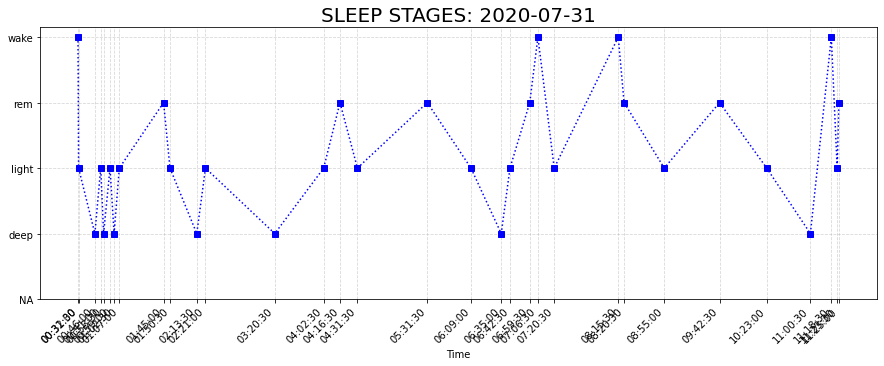

In [41]:
# PLOTTING SLEEP STAGES DAY BY DAY (For better visualisation)

def convert_stage(x):
    if x == 'wake':
        return 3.0
    elif x == 'rem':
        return 2.0
    elif x == 'light':
        return 1.0
    elif x == 'deep':
        return 0.0
    else: return -1.0

Date_Select = '2020-07-31'# Change date here

mask = df_intraSleepStage_Fitbit.dateOfSleep == Date_Select

y_values = df_intraSleepStage_Fitbit[mask].level.apply(convert_stage)

sleep_time_axis = df_intraSleepStage_Fitbit[mask].index

plt.figure(figsize=(15,5))
plt.plot(sleep_time_axis,y_values,'s:b')

plt.title('SLEEP STAGES: '+ Date_Select,fontdict={'fontsize':20})

plt.xticks(ticks= sleep_time_axis, labels= df_intraSleepStage_Fitbit[mask].time,
           rotation=45, ha='right')
plt.xlabel('Time')

plt.yticks(ticks= [-1,0,1,2,3], labels= ['NA','deep','light','rem','wake'])

plt.grid(True,alpha=0.5,ls='--')

plt.show()

In [42]:
# Checking the days to exclude for Sleep Records:
# Null sleep records are not recorded by default. 
# We would need to exclude the days where sleep is too short to have meaningful data (< 3 hours)
# which will give NaN values.

exclude_Sleep_dates = df_SleepDurations_Fitbit[df_SleepDurations_Fitbit.duration <= 180].index.tolist()

print('Total number of recorded days of Sleep data: ', len(df_SleepDurations_Fitbit.index), 
      ', Less than / Equal 3 Hr of sleep : ',len(exclude_Sleep_dates))
print('\nDays to exclude: \n',exclude_Sleep_dates)

Total number of recorded days of Sleep data:  61 , Less than / Equal 3 Hr of sleep :  1

Days to exclude: 
 ['2020-07-12']


### Steps Activity Data Frame:

In [43]:
# DF for Steps Data

df_Activity_Steps_fitbit = pd.DataFrame(subject.step_activity_data)
df_Activity_Steps_fitbit.set_index(df_Activity_Steps_fitbit.dateTime,inplace=True)
df_Activity_Steps_fitbit.drop(columns=['dateTime'],inplace=True)
df_Activity_Steps_fitbit['value'] = df_Activity_Steps_fitbit.value.astype(int)
df_Activity_Steps_fitbit.rename(columns={'value':'step_count'},inplace=True)

df_Activity_Steps_fitbit

,step_count
dateTime,
2020-04-05,2233
2020-04-06,8208
2020-04-07,6070
2020-04-08,9494
2020-04-09,4849
...,...
2020-07-27,5686
2020-07-28,4282
2020-07-29,7370


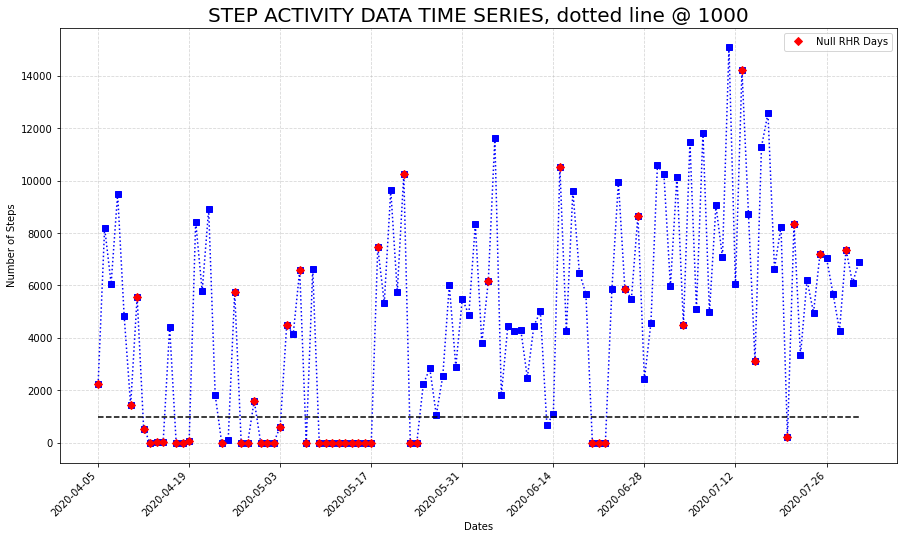

In [44]:
# PLOTTING STEP ACTIVITY DATA AND FINDING NULL DAYS
# Null days for the tracker (days when user did not wear the tracker)

plt.figure(figsize=(15,8))

plt.plot(df_Activity_Steps_fitbit.step_count,'s:b')
plt.plot(df_Activity_Steps_fitbit.loc[null_RHR_dates].step_count,'Dr',label="Null RHR Days") # Highlight the Zeros in RHR

plt.plot(df_Activity_Steps_fitbit.index,np.full_like(df_Activity_Steps_fitbit.index,1000),'--k')

plt.xlabel('Dates')
plt.xticks(np.arange(0,len(df_Activity_Steps_fitbit),14),rotation=45,ha='right')

plt.ylabel('Number of Steps')

plt.title('STEP ACTIVITY DATA TIME SERIES, dotted line @ 1000',fontdict={'fontsize':20})

plt.grid(True,alpha=0.5,ls='--')

plt.legend()

plt.show()

The Null Records in RHR does not correspond to Zero Step activity (Shown in Red), but close enough. On days when activities are lesser than 1000 it can also be considered as no activity. 1000 is chosen from 10% of the widely accepted healthy target of 10,000 steps. No RHR days meant that the tracker was not worned to sleep.

In [45]:
null_steps_dates = df_Activity_Steps_fitbit[df_Activity_Steps_fitbit.step_count<=1000].index.to_list()
print("Number of days that steps are less than 1000 :", len(null_steps_dates),'\n',null_steps_dates)

Number of days that steps are less than 1000 : 32 
 ['2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-24', '2020-04-25', '2020-04-27', '2020-04-28', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-07', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-23', '2020-05-24', '2020-06-13', '2020-06-20', '2020-06-21', '2020-06-22', '2020-07-20']


In [46]:
print('The dates to exclude for Heart Rate DFs: \n', null_RHR_dates)

print('\nThe dates to exclude for Steps Activity DF: \n', null_steps_dates)

print('\nDays with no Intra-Day Heart Rate records: \n', null_IntraDay_dates)

print('\nThe dates to exclude for Sleep DFs: \n', exclude_Sleep_dates)

The dates to exclude for Heart Rate DFs: 
 ['2020-04-05', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-24', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-06', '2020-05-07', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-22', '2020-05-23', '2020-05-24', '2020-06-04', '2020-06-15', '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-25', '2020-06-27', '2020-07-04', '2020-07-13', '2020-07-15', '2020-07-20', '2020-07-21', '2020-07-25', '2020-07-29']

The dates to exclude for Steps Activity DF: 
 ['2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-24', '2020-04-25', '2020-04-27', '2020-04-28', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-07'

In [47]:
# CLEANING OF DATA: Dropping of Data points as indexed above.

# Daily Resting Heart Rate DF:
df_RESTING_HR_fitbit = df_RESTING_HR_fitbit.dropna()

# Daily Heart Rate Zones (HR Activities) DF:
df_HR_ZONES_fitbit_new = df_HR_ZONES_fitbit_new.drop(index=null_RHR_dates)

# As RHR will still have values if worn for just 3 hours, further cleaning criteria is required:
df_HR_ZONES_fitbit_new = df_HR_ZONES_fitbit_new[df_HR_ZONES_fitbit_new.Total_caloriesOut > 500]

# Intra-day Heart Rate DF (Not required for initial cleaning):
# df_Intra_HR_AllinSeries

# Sleep Durations DF (drop days in exclude_Sleep_dates):
df_SleepDurations_Fitbit = df_SleepDurations_Fitbit.dropna()

# Sleep Durations DF (drop days in exclude_Sleep_dates):
for day in exclude_Sleep_dates:
    mask = df_intraSleepStage_Fitbit.dateOfSleep == day
    records_to_drop = df_intraSleepStage_Fitbit[mask].index
    df_intraSleepStage_Fitbit = df_intraSleepStage_Fitbit.drop(index=records_to_drop)

# Daily Steps Activity DF (drop days in null_steps_dates):
df_Activity_Steps_fitbit = df_Activity_Steps_fitbit.drop(index=null_steps_dates)


### Dumping the DATAFRAMES into PICKLE for each subject

Saving the processed DF under each person. Change to CSV file saving for future use.

Save to Pickle file:

In [49]:
current_directory = os.getcwd()

folder_path = os.path.join(current_directory,"PERSON2","31JUL") # Change dirctory Here

# SAVE TO PICKLE:

pickle_list = {
                # Daily Resting Heart Rate DF:
                'df_resting_hr':df_RESTING_HR_fitbit,

                # Daily Heart Rate Zones (HR Activities) DF:
                'df_hr_calories':df_HR_ZONES_fitbit_new,

                # Intra-day Heart Rate DF:
                'df_intraday_hr':df_Intra_HR_AllinSeries,

                # Sleep Durations DF
                'df_sleep_durations':df_SleepDurations_Fitbit,

                # Detailed intra Sleep Stages DF
                'df_intra_sleep_stage':df_intraSleepStage_Fitbit,
    
                # Daily Step activities DF:
                'df_activity_steps':df_Activity_Steps_fitbit
                }

# Save to Pickle:
for i in pickle_list.keys():
    file = os.path.join(folder_path, str(i)+'.pickle')
    with open(file,'wb') as f:
        pickle.dump(obj=pickle_list[i],file=f)
